In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
import sys
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


# remove warnings
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', category=RuntimeWarning, module='pandas.io.formats.format')

# 1. Loading Dataset

In [2]:
# Loading the data
new_data = pd.read_csv("/kaggle/input/seperated-data/India_Delhi.csv")

# print the shape
print(new_data.shape)

#runs the first 5 rows
new_data.head()

(2399, 12)


,Date,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
0,2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
1,2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2,2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
3,2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
4,2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [3]:
# Find the minimum and maximum dates
min_date = new_data['Date'].min()
max_date = new_data['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2014-12-29
Maximum date: 2023-10-01


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2399 non-null   object 
 1   co            2399 non-null   float64
 2   no2           2399 non-null   float64
 3   o3            2399 non-null   float64
 4   pm10          2398 non-null   float64
 5   pm25          2398 non-null   float64
 6   so2           2399 non-null   float64
 7   humidity      1698 non-null   float64
 8   pressure      1698 non-null   float64
 9   temperature   1698 non-null   float64
 10  wind-speed    1629 non-null   float64
 11  Country_City  2399 non-null   object 
dtypes: float64(10), object(2)
memory usage: 225.0+ KB


In [5]:
new_data.describe()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
count,0.0,0.0,0.0,0.0,1570.000000,0.0,1546.000000,1546.000000,1546.000000,1452.000000
mean,NaN,NaN,NaN,NaN,177.652229,NaN,60.527814,1008.290944,24.336869,2.848829
std,NaN,NaN,NaN,NaN,83.876598,NaN,16.844766,7.182917,8.097599,1.260782
min,NaN,NaN,NaN,NaN,5.000000,NaN,18.000000,992.000000,6.000000,0.500000
25%,NaN,NaN,NaN,NaN,127.000000,NaN,50.000000,1002.000000,18.000000,2.000000
50%,NaN,NaN,NaN,NaN,159.000000,NaN,62.000000,1008.000000,26.500000,2.500000
75%,NaN,NaN,NaN,NaN,196.000000,NaN,72.000000,1015.000000,30.500000,3.600000
max,NaN,NaN,NaN,NaN,568.000000,NaN,100.000000,1024.000000,39.000000,8.700000


In [5]:
# Investigate all the elements whithin each Feature

for column in new_data:
    # Handle numerical and string columns differently
    if new_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = new_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(new_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :2397
The number of values for feature co :200
The number of values for feature no2 :328
The number of values for feature o3 :226
The number of values for feature pm10 :320
The number of values for feature pm25 :309
The number of values for feature so2 :116
The number of values for feature humidity :602
The number of values for feature pressure :300
The number of values for feature temperature :264
The number of values for feature wind-speed :33
The number of values for feature Country_City :1 -- ['India_Delhi']


In [6]:
new_data.isna().sum()

Date              0
co                0
no2               0
o3                0
pm10              1
pm25              1
so2               0
humidity        701
pressure        701
temperature     701
wind-speed      770
Country_City      0
dtype: int64

# 1.2 - Function -- Preprocessing

In [8]:
print(os.listdir('/kaggle/usr/lib/function-v'))

['function_v.py', '__results__.html', '__notebook__.ipynb', '__output__.json', 'custom.css']


In [9]:
sys.path.append("/kaggle/usr/lib/function_v")  # Add directory to the path

import function_v as fn

# Datetime index 

In [10]:
# Use the functions
new_data1 = fn.prepare_datetime_index(new_data, date_column='Date')
new_data1.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
Date,,,,,,,,,,,
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [11]:
new_data1.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City'],
      dtype='object')

In [12]:
# Drop collumns which have large quantity of missing value and of no use
new_data2 = new_data1.drop(['humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City'], axis= 1)

In [13]:
new_data2.isna().sum()

co      0
no2     0
o3      0
pm10    1
pm25    1
so2     0
dtype: int64

# Imputing 

In [14]:
# Fill the missing value 

imputer = SimpleImputer(strategy="mean")

# Select the columns
columns_to_impute = ['pm10', 'pm25']

new_data2[columns_to_impute] = imputer.fit_transform(new_data2[columns_to_impute])

In [15]:
new_data2.isna().sum()

co      0
no2     0
o3      0
pm10    0
pm25    0
so2     0
dtype: int64

# Missing Dates

In [16]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data2.index.min(), end=new_data2.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data2.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
               '2015-07-10', '2015-07-11', '2015-07-12', '2015-07-13',
               '2015-07-14', '2015-07-15',
               ...
               '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21',
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27'],
              dtype='datetime64[ns]', length=802, freq=None)


In [17]:
new_data3 = fn.impute_missing_dates(new_data2)

In [18]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data3.index.min(), end=new_data3.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data3.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [19]:
duplicates = new_data3.index[new_data3.index.duplicated()]
print(f"Duplicate indexes: {duplicates}")

Duplicate indexes: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


# AQI Count

In [20]:
new_data4 = fn.calculate_aqi(new_data3)

In [21]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,172.0


# 1.3 - Plot & Heatmap

<Axes: >

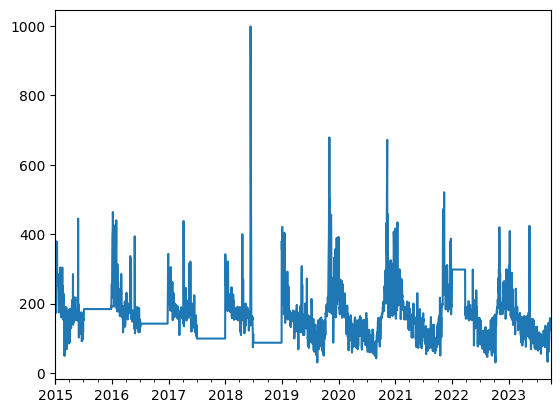

In [22]:
norm_aqi = new_data4['AQI']
norm_aqi.plot()

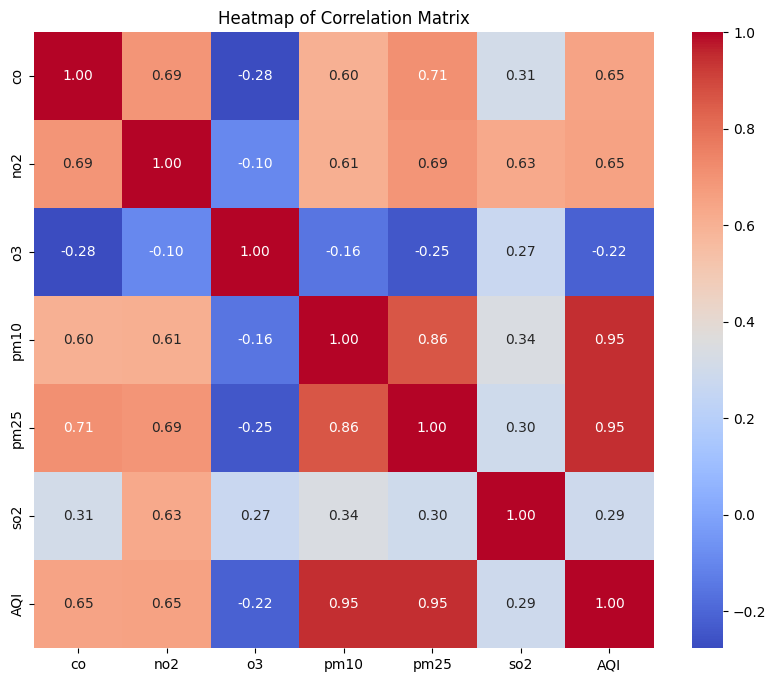

In [23]:
# Calculate the correlation matrix for numeric columns
corr = new_data4.corr(numeric_only=True)

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Correlation Matrix")
#file_name = "correlation_matrix.png"
#path = "/kaggle/working/data-after-combine"
#plt.savefig(path,file_name)
plt.show()

# 2. Machine Learning (without scaling)

# 2.1. Splitting & Preprocessing the Raw Data(Normal AQI)

In [24]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'AQI'], dtype='object')

In [25]:
data = new_data4.copy()

In [26]:
data.head()

,co,no2,o3,pm10,pm25,so2,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,172.0


In [27]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'AQI'], dtype='object')
Index([], dtype='object')


In [28]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']]

y = data['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2559, 6) (2559,) (640, 6) (640,)


In [29]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# 2.2. ML Model

In [30]:
def compare_and_save_models(X_train, X_test, y_train, y_test, preprocessor, metric='mse', save_dir='models'):
    
    
    # Initialize models
    models = {
        'knn': KNeighborsRegressor(n_neighbors=2),
        'random_forest': RandomForestRegressor(),
        'xgboost': XGBRegressor(objective='reg:squarederror'),
        'svr' : SVR(kernel='linear'),
        'neural_network': MLPRegressor(hidden_layer_sizes=(8,), activation='relu', 
                                     solver='adam', max_iter=2000, 
                                     learning_rate_init=0.0005)
    }
    
    # Dictionary to store results
    results = {}
    
    # Create save directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Train and evaluate each model
    for name, model in models.items():
        # Create pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                 ('regressor', model)])
        
        # Train model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)
        
        # Calculate metrics
        metrics = {
            'r2_train': r2_score(y_train, y_pred_train),
            'r2_test': r2_score(y_test, y_pred_test),
            'rmse_train': sqrt(mean_squared_error(y_train, y_pred_train)),
            'rmse_test': sqrt(mean_squared_error(y_test, y_pred_test)),
            'mae_train': mean_absolute_error(y_train, y_pred_train),
            'mae_test': mean_absolute_error(y_test, y_pred_test),
            'mse_train': mean_squared_error(y_train, y_pred_train),
            'mse_test': mean_squared_error(y_test, y_pred_test)
        }
        
        results[name] = {
            'pipeline': pipeline,
            'metrics': metrics
        }
    
    # Determine best model based on specified metric
    metric_map = {
        'r2': 'r2_test',
        'rmse': 'rmse_test',
        'mae': 'mae_test',
        'mse': 'mse_test'
    }
    
    comparison_metric = metric_map[metric]
    
    if metric == 'r2':  # Only R² should use max, all others should use min
        best_model = max(results.items(), 
                        key=lambda x: x[1]['metrics'][comparison_metric])
    else:  # For MSE, RMSE, MAE - lower is better
        best_model = min(results.items(), 
                        key=lambda x: x[1]['metrics'][comparison_metric])
    
    # Save the best model
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_path = os.path.join(save_dir, 
                             f'best_model_{best_model[0]}_{timestamp}.joblib')
    joblib.dump(best_model[1]['pipeline'], model_path)
    
    # Prepare return dictionary
    return_dict = {
        'best_model': best_model[0],
        'best_model_path': model_path,
        'model_performances': {name: results[name]['metrics'] 
                             for name in results.keys()}
    }
    
    return return_dict

In [31]:
# Get the results first
results = compare_and_save_models(
    X_train, X_test, y_train, y_test,
    preprocessor,
    metric='mse',
    save_dir='models'
)

In [32]:
# Print detailed results for all models
print("\nDetailed Model Performance Summary:")
print("-" * 50)

for model_name, performance in results['model_performances'].items():
    print(f"\n{model_name.upper()} Results:")
    print(f"R² score (train): {performance['r2_train']:.4f}")
    print(f"R² score (test): {performance['r2_test']:.4f}")
    print(f"RMSE (train): {performance['rmse_train']:.4f}")
    print(f"RMSE (test): {performance['rmse_test']:.4f}")
    print(f"MAE (train): {performance['mae_train']:.4f}")
    print(f"MAE (test): {performance['mae_test']:.4f}")
    print(f"MSE (train): {performance['mse_train']:.4f}")
    print(f"MSE (test): {performance['mse_test']:.4f}")

print("\n" + "=" * 50)
print(f"Best Model: {results['best_model']}")
print(f"Model saved at: {results['best_model_path']}")


Detailed Model Performance Summary:
--------------------------------------------------

KNN Results:
R² score (train): 0.9982
R² score (test): 0.9967
RMSE (train): 3.1271
RMSE (test): 3.8536
MAE (train): 0.9207
MAE (test): 1.4258
MSE (train): 9.7786
MSE (test): 14.8504

RANDOM_FOREST Results:
R² score (train): 0.9989
R² score (test): 0.9957
RMSE (train): 2.4755
RMSE (test): 4.4219
MAE (train): 0.2923
MAE (test): 0.6665
MSE (train): 6.1282
MSE (test): 19.5531

XGBOOST Results:
R² score (train): 1.0000
R² score (test): 0.9884
RMSE (train): 0.2783
RMSE (test): 7.2586
MAE (train): 0.1657
MAE (test): 1.2285
MSE (train): 0.0775
MSE (test): 52.6868

SVR Results:
R² score (train): 0.8857
R² score (test): 0.9390
RMSE (train): 25.0366
RMSE (test): 16.6544
MAE (train): 3.4427
MAE (test): 2.4140
MSE (train): 626.8323
MSE (test): 277.3704

NEURAL_NETWORK Results:
R² score (train): 1.0000
R² score (test): 1.0000
RMSE (train): 0.0972
RMSE (test): 0.1462
MAE (train): 0.0324
MAE (test): 0.0380
MSE (tr

# 3. Machine Learning (with scaling)

# 3.1. Splitting & Preprocessing the Raw Data(Normal AQI)

In [33]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'AQI'], dtype='object')

In [34]:
data = new_data4.copy()

In [35]:
data.head()

,co,no2,o3,pm10,pm25,so2,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,172.0


In [36]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'AQI'], dtype='object')
Index([], dtype='object')


In [37]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']]

y = data['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2559, 6) (2559,) (640, 6) (640,)


In [38]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[ 
            ('scaler', StandardScaler())
        ]), ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])  
    ])
    
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# 3.2. ML Model

In [39]:
def compare_and_save_models(X_train, X_test, y_train, y_test, preprocessor, metric='mse', save_dir='models'):
    
    
    # Initialize models
    models = {
        'knn': KNeighborsRegressor(n_neighbors=2),
        'random_forest': RandomForestRegressor(),
        'xgboost': XGBRegressor(objective='reg:squarederror'),
        'svr' : SVR(kernel='linear'),
        'neural_network': MLPRegressor(hidden_layer_sizes=(8,), activation='relu', 
                                     solver='adam', max_iter=2000, 
                                     learning_rate_init=0.0005)
    }
    
    # Dictionary to store results
    results = {}
    
    # Create save directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Train and evaluate each model
    for name, model in models.items():
        # Create pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                 ('regressor', model)])
        
        # Train model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)
        
        # Calculate metrics
        metrics = {
            'r2_train': r2_score(y_train, y_pred_train),
            'r2_test': r2_score(y_test, y_pred_test),
            'rmse_train': sqrt(mean_squared_error(y_train, y_pred_train)),
            'rmse_test': sqrt(mean_squared_error(y_test, y_pred_test)),
            'mae_train': mean_absolute_error(y_train, y_pred_train),
            'mae_test': mean_absolute_error(y_test, y_pred_test),
            'mse_train': mean_squared_error(y_train, y_pred_train),
            'mse_test': mean_squared_error(y_test, y_pred_test)
        }
        
        results[name] = {
            'pipeline': pipeline,
            'metrics': metrics
        }
    
    # Determine best model based on specified metric
    metric_map = {
        'r2': 'r2_test',
        'rmse': 'rmse_test',
        'mae': 'mae_test',
        'mse': 'mse_test'
    }
    
    comparison_metric = metric_map[metric]
    
    if metric == 'r2':  # Only R² should use max, all others should use min
        best_model = max(results.items(), 
                        key=lambda x: x[1]['metrics'][comparison_metric])
    else:  # For MSE, RMSE, MAE - lower is better
        best_model = min(results.items(), 
                        key=lambda x: x[1]['metrics'][comparison_metric])
    
    # Save the best model
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_path = os.path.join(save_dir, 
                             f'best_model_{best_model[0]}_{timestamp}.joblib')
    joblib.dump(best_model[1]['pipeline'], model_path)
    
    # Prepare return dictionary
    return_dict = {
        'best_model': best_model[0],
        'best_model_path': model_path,
        'model_performances': {name: results[name]['metrics'] 
                             for name in results.keys()}
    }
    
    return return_dict

In [40]:
# Get the results first
results = compare_and_save_models(
    X_train, X_test, y_train, y_test,
    preprocessor,
    metric='mse',
    save_dir='models'
)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
# Print detailed results for all models
print("\nDetailed Model Performance Summary:")
print("-" * 50)

for model_name, performance in results['model_performances'].items():
    print(f"\n{model_name.upper()} Results:")
    print(f"R² score (train): {performance['r2_train']:.4f}")
    print(f"R² score (test): {performance['r2_test']:.4f}")
    print(f"RMSE (train): {performance['rmse_train']:.4f}")
    print(f"RMSE (test): {performance['rmse_test']:.4f}")
    print(f"MAE (train): {performance['mae_train']:.4f}")
    print(f"MAE (test): {performance['mae_test']:.4f}")
    print(f"MSE (train): {performance['mse_train']:.4f}")
    print(f"MSE (test): {performance['mse_test']:.4f}")

print("\n" + "=" * 50)
print(f"Best Model: {results['best_model']}")
print(f"Model saved at: {results['best_model_path']}")


Detailed Model Performance Summary:
--------------------------------------------------

KNN Results:
R² score (train): 0.9917
R² score (test): 0.9797
RMSE (train): 6.7549
RMSE (test): 9.6061
MAE (train): 3.5912
MAE (test): 5.4258
MSE (train): 45.6292
MSE (test): 92.2777

RANDOM_FOREST Results:
R² score (train): 0.9987
R² score (test): 0.9958
RMSE (train): 2.6581
RMSE (test): 4.3611
MAE (train): 0.2872
MAE (test): 0.6443
MSE (train): 7.0656
MSE (test): 19.0189

XGBOOST Results:
R² score (train): 1.0000
R² score (test): 0.9884
RMSE (train): 0.2783
RMSE (test): 7.2586
MAE (train): 0.1657
MAE (test): 1.2285
MSE (train): 0.0775
MSE (test): 52.6868

SVR Results:
R² score (train): 0.8850
R² score (test): 0.9386
RMSE (train): 25.1130
RMSE (test): 16.7134
MAE (train): 3.4212
MAE (test): 2.3825
MSE (train): 630.6607
MSE (test): 279.3394

NEURAL_NETWORK Results:
R² score (train): 0.9932
R² score (test): 0.9922
RMSE (train): 6.1194
RMSE (test): 5.9572
MAE (train): 3.4720
MAE (test): 3.5473
MSE (t

# 4 - Deep Learning Model(Without Scaling)

# 4.1. Splitting & Preprocessing the Raw Data(Normal AQI)

In [42]:
aqi_normal = new_data4.copy()

In [50]:
def new_data_to_X_y(new_data, window_size, train_pct, val_pct, test_pct):
    
    new_data_as_np = new_data.to_numpy()
    
    # Split features and target
    features = new_data_as_np[:, :-1]  # All columns except the last one
    target = new_data_as_np[:, -1]     # Only the AQI column
    
    # Split data based on percentages
    total_len = len(features)
    train_end = int(train_pct * total_len)
    val_end = train_end + int(val_pct * total_len)
    
    # Prepare train, val, and test splits for both features and target
    train_features = features[:train_end]
    train_target = target[:train_end]
    
    val_features = features[train_end:val_end]
    val_target = target[train_end:val_end]
    
    test_features = features[val_end:]
    test_target = target[val_end:]
    
    # Helper function to create X and y
    def create_X_y(feature_data, target_data):
        X, y = [], []
        for i in range(len(feature_data) - window_size):
            # Create sequence of all features
            sequence = feature_data[i:i + window_size]
            X.append(sequence)
            # Get the target AQI value
            y.append(target_data[i + window_size])
        return np.array(X), np.array(y)
    
    
    X_train, y_train = create_X_y(train_features, train_target)
    X_val, y_val = create_X_y(val_features, val_target)
    X_test, y_test = create_X_y(test_features, test_target)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [51]:
WINDOW_SIZE = 6
NUM_FEATURES = 6
train_pct = 0.8
val_pct = 0.1
test_pct = 0.1

(X_train1, y_train1), (X_val1, y_val1), (X_test1, y_test1) = new_data_to_X_y(
    aqi_normal, WINDOW_SIZE, train_pct, val_pct, test_pct
)

In [52]:
# shapes
print("Train shapes:", X_train1.shape, y_train1.shape)
print("Validation shapes:", X_val1.shape, y_val1.shape)
print("Test shapes:", X_test1.shape, y_test1.shape)

Train shapes: (2553, 6, 6) (2553,)
Validation shapes: (313, 6, 6) (313,)
Test shapes: (315, 6, 6) (315,)


#  4.2. DL Model

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

Bi-LSTM

In [54]:
lstm_model = Sequential()
lstm_model.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
lstm_model.add(BatchNormalization())
lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Bidirectional(LSTM(32)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(BatchNormalization())
lstm_model.add(Dense(16, activation='relu'))
lstm_model.add(Dense(1, activation='linear'))

lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_2                │ (None, 6, 6)                │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 6, 128)              │          36,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,345 (313.85 KB)

 Trainable params: 80,269 (313.55 KB)

 Non-trainable params: 76 (304.00 B)

In [55]:
cp1 = ModelCheckpoint('/kaggle/working/lstm_model1.keras', save_best_only=True)

lstm_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [56]:
lstm_model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp1])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 30632.1426 - mean_absolute_error: 160.4469 - val_loss: 38589.4336 - val_mean_absolute_error: 178.3625
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 29204.8789 - mean_absolute_error: 156.4550 - val_loss: 35894.8320 - val_mean_absolute_error: 172.5405
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 27782.3047 - mean_absolute_error: 152.8803 - val_loss: 30255.6094 - val_mean_absolute_error: 158.5548
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 25551.3086 - mean_absolute_error: 144.6631 - val_loss: 24093.7754 - val_mean_absolute_error: 141.9161
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 21477.1562 - mean_absolute_error: 134.3906 - val_loss: 19946.5723 - val_mean_absolute_error: 129.2613
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 17765.8574 - mean_absolute_error: 122.6391 - val_loss: 14567.6758 - val_mean_absolute_error: 111.0166
Epoch 7/100
80/80 ━━━━━━━━━━

In [57]:
from tensorflow.keras.models import load_model
model1 = load_model('/kaggle/working/lstm_model1.keras')

In [58]:
# Evaluate the model on the train data
train_result = model1.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 19.3456
Mean Squared Error (MSE): 1391.7967
Root Mean Squared Error (RMSE): 37.3068
R-squared (Accuracy): 0.7305


In [59]:
# Evaluate the model on the validation data
val_result = model1.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 22.4188
Mean Squared Error (MSE): 864.1427
Root Mean Squared Error (RMSE): 29.3963
R-squared (Accuracy): 0.8838


In [56]:
# Evaluate the model on the test data
test_result = model1.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 35.2140
Mean Squared Error (MSE): 2717.1395
Root Mean Squared Error (RMSE): 52.1262
R-squared (Accuracy): 0.7525


In [61]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,217.050247,195.0
1,194.624817,185.0
2,198.506256,208.0
3,225.726227,290.0
4,262.015900,267.0
...,...,...
2548,386.872955,387.0
2549,320.846558,169.0
2550,198.726807,197.0
2551,239.549591,191.0


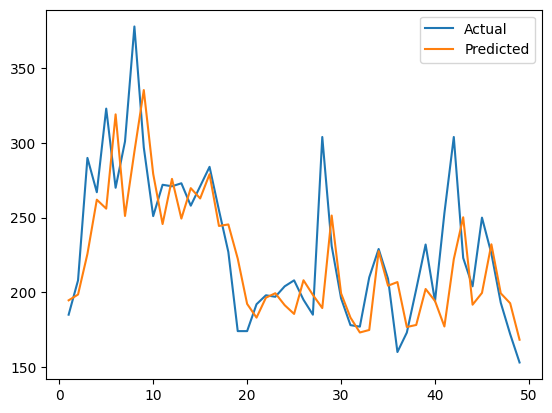

In [62]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [63]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,277.275574,298.0
1,277.281433,298.0
2,276.368530,298.0
3,276.368530,298.0
4,276.368530,298.0
...,...,...
308,184.809174,193.0
309,219.380661,199.0
310,208.548462,197.0
311,203.903473,197.0


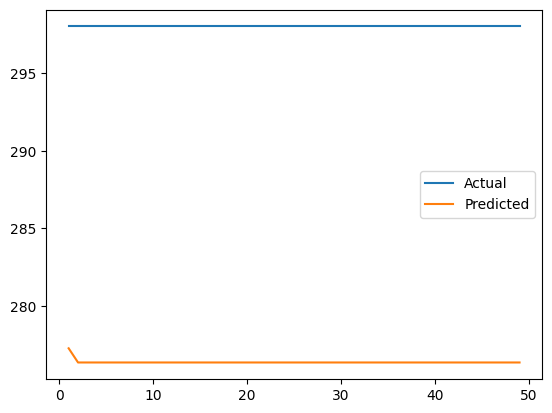

In [64]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [65]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,201.750397,190.0
1,193.481750,177.0
2,184.366791,172.0
3,181.839417,170.0
4,177.269928,197.0
...,...,...
310,140.769257,134.0
311,136.444855,144.0
312,140.307526,155.0
313,150.253922,155.0


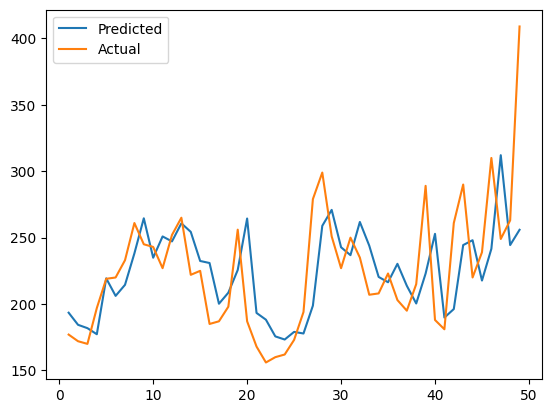

In [66]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

GRU

In [67]:
gru_model = Sequential()
gru_model.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
gru_model.add(BatchNormalization())
gru_model.add(Bidirectional(GRU(64, return_sequences=True)))
gru_model.add(Dropout(0.3))
gru_model.add(Bidirectional(GRU(32)))
gru_model.add(Dropout(0.3))
gru_model.add(Dense(32, activation='relu'))
gru_model.add(BatchNormalization())
gru_model.add(Dense(16, activation='relu'))
gru_model.add(Dense(1, activation='linear'))

gru_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_4                │ (None, 6, 6)                │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 6, 128)              │          27,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 64)                  │          31,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,529 (240.35 KB)

 Trainable params: 61,453 (240.05 KB)

 Non-trainable params: 76 (304.00 B)

In [68]:
cp2 = ModelCheckpoint('/kaggle/working/gru_model1.keras', save_best_only=True)

gru_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [69]:
gru_model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp2])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 31228.7207 - mean_absolute_error: 162.1461 - val_loss: 35096.2891 - val_mean_absolute_error: 170.3836
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 32052.6445 - mean_absolute_error: 161.1591 - val_loss: 30237.1309 - val_mean_absolute_error: 159.4249
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 28038.0625 - mean_absolute_error: 152.7561 - val_loss: 25028.2578 - val_mean_absolute_error: 145.9151
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 24197.9609 - mean_absolute_error: 143.6682 - val_loss: 18816.1309 - val_mean_absolute_error: 126.7990
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 20890.4121 - mean_absolute_error: 132.8593 - val_loss: 16269.7090 - val_mean_absolute_error: 118.2203
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 16214.0977 - mean_absolute_error: 116.5953 - val_loss: 11540.6504 - val_mean_absolute_error: 99.2033
Epoch 7/100
80/80 ━━━━━━━━━━━

In [70]:
from tensorflow.keras.models import load_model
model2 = load_model('/kaggle/working/gru_model1.keras')

In [71]:
# Evaluate the model on the train data
train_result = model2.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 18.8606
Mean Squared Error (MSE): 1255.7262
Root Mean Squared Error (RMSE): 35.4362
R-squared (Accuracy): 0.7568


In [72]:
# Evaluate the model on the validation data
val_result = model2.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 18.0500
Mean Squared Error (MSE): 707.3033
Root Mean Squared Error (RMSE): 26.5952
R-squared (Accuracy): 0.9049


In [73]:
# Evaluate the model on the test data
test_result = model2.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 21.8288
Mean Squared Error (MSE): 1151.5971
Root Mean Squared Error (RMSE): 33.9352
R-squared (Accuracy): 0.6515


In [74]:
train_predictions = model2.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,202.521881,195.0
1,190.480026,185.0
2,196.608093,208.0
3,236.725952,290.0
4,273.948914,267.0
...,...,...
2548,379.683228,387.0
2549,280.822235,169.0
2550,189.334274,197.0
2551,224.830582,191.0


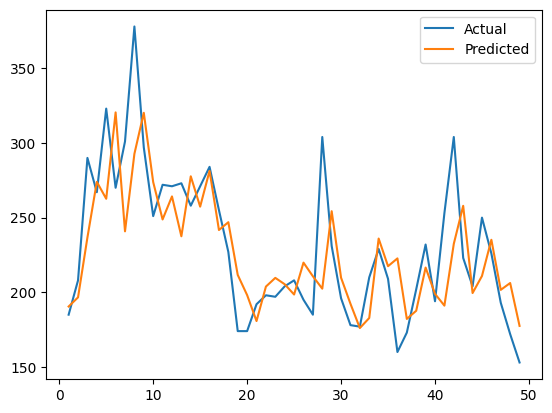

In [75]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [72]:
val_predictions = model2.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,93.349548,95.0
1,93.349548,95.0
2,93.349548,95.0
3,93.349548,95.0
4,93.349548,95.0
...,...,...
196,157.365265,157.0
197,157.365265,157.0
198,157.365265,157.0
199,157.365265,122.0


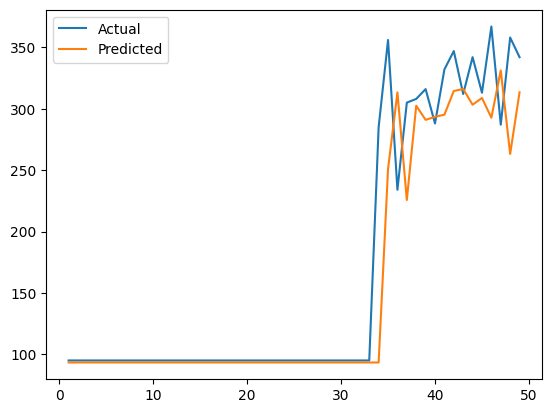

In [73]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [76]:
test_predictions = model2.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,211.124054,190.0
1,199.600449,177.0
2,186.167847,172.0
3,185.661057,170.0
4,181.347839,197.0
...,...,...
310,146.173691,134.0
311,142.192459,144.0
312,147.865936,155.0
313,155.633545,155.0


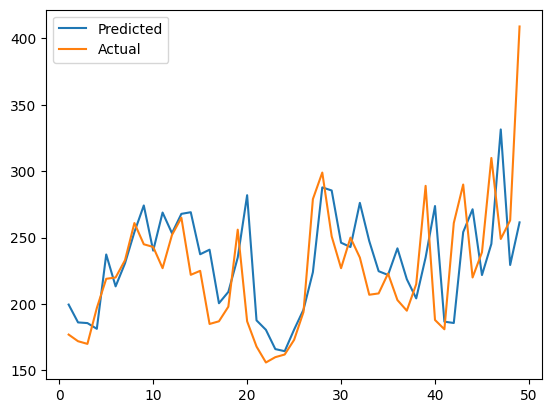

In [77]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

RNN

In [78]:
rnn_model = Sequential()
rnn_model.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
rnn_model.add(BatchNormalization())
rnn_model.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
rnn_model.add(Dropout(0.3))
rnn_model.add(Bidirectional(SimpleRNN(32)))
rnn_model.add(Dropout(0.3))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(BatchNormalization())
rnn_model.add(Dense(16, activation='relu'))
rnn_model.add(Dense(1, activation='linear'))

rnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_6                │ (None, 6, 6)                │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 6, 128)              │           9,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 64)                  │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,169 (86.60 KB)

 Trainable params: 22,093 (86.30 KB)

 Non-trainable params: 76 (304.00 B)

In [79]:
cp3 = ModelCheckpoint('/kaggle/working/rnn_model1.keras', save_best_only=True)

rnn_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [80]:
rnn_model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp3])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - loss: 31075.4062 - mean_absolute_error: 161.0282 - val_loss: 34769.3789 - val_mean_absolute_error: 167.9572
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 31358.7754 - mean_absolute_error: 158.6752 - val_loss: 30651.5312 - val_mean_absolute_error: 158.8239
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 27351.3008 - mean_absolute_error: 150.7558 - val_loss: 26712.8145 - val_mean_absolute_error: 148.5185
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 23399.8086 - mean_absolute_error: 139.8766 - val_loss: 22428.0918 - val_mean_absolute_error: 136.2129
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 20526.1074 - mean_absolute_error: 129.5311 - val_loss: 17005.0020 - val_mean_absolute_error: 119.0034
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 15833.3154 - mean_absolute_error: 114.0849 - val_loss: 12338.3926 - val_mean_absolute_error: 100.9970
Epoch 7/100
80/80 ━━━━━━━━━━━━━━

In [81]:
from tensorflow.keras.models import load_model
model3 = load_model('/kaggle/working/rnn_model1.keras')

In [82]:
# Evaluate the model on the train data
train_result = model3.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 21.6356
Mean Squared Error (MSE): 1584.8107
Root Mean Squared Error (RMSE): 39.8097
R-squared (Accuracy): 0.6931


In [83]:
# Evaluate the model on the validation data
val_result = model3.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 19.3153
Mean Squared Error (MSE): 734.5543
Root Mean Squared Error (RMSE): 27.1027
R-squared (Accuracy): 0.9012


In [84]:
# Evaluate the model on the test data
test_result = model3.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 21.8544
Mean Squared Error (MSE): 1115.5328
Root Mean Squared Error (RMSE): 33.3996
R-squared (Accuracy): 0.6624


In [85]:
train_predictions = model3.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Train Predictions,Actuals
0,209.507187,195.0
1,178.969040,185.0
2,213.818954,208.0
3,231.509613,290.0
4,272.046051,267.0
...,...,...
2548,312.516998,387.0
2549,306.750519,169.0
2550,185.972534,197.0
2551,248.306900,191.0


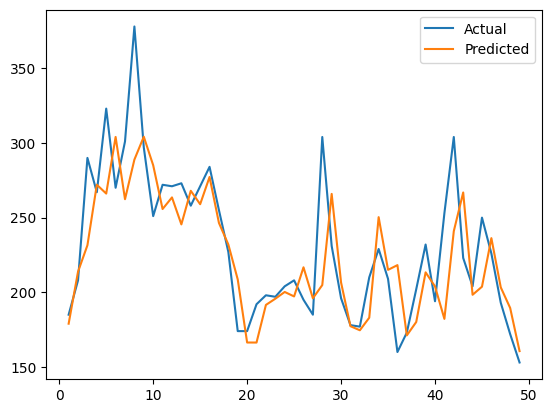

In [86]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [87]:
val_predictions = model3.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,288.740723,298.0
1,287.294403,298.0
2,286.377136,298.0
3,286.377136,298.0
4,286.377136,298.0
...,...,...
308,178.395706,193.0
309,226.304733,199.0
310,209.122726,197.0
311,215.808044,197.0


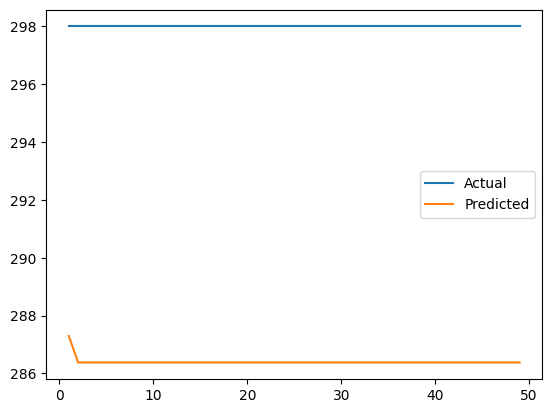

In [88]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [89]:
test_predictions = model3.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,214.473465,190.0
1,199.628998,177.0
2,180.444534,172.0
3,183.934494,170.0
4,178.097977,197.0
...,...,...
310,138.857986,134.0
311,135.798477,144.0
312,140.139847,155.0
313,148.350174,155.0


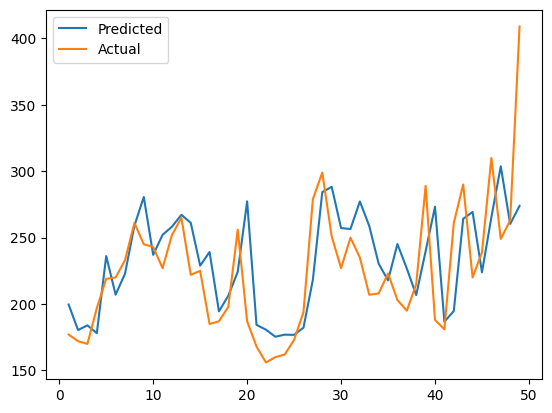

In [90]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

CNN-GRU(Bi)

In [91]:
cnn_gru_model = Sequential()
cnn_gru_model.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
cnn_gru_model.add(BatchNormalization())
cnn_gru_model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn_gru_model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn_gru_model.add(Dropout(0.3))
cnn_gru_model.add(Bidirectional(GRU(32, return_sequences=True)))
cnn_gru_model.add(Dropout(0.3))
cnn_gru_model.add(Bidirectional(GRU(16)))
cnn_gru_model.add(Dense(32, activation='relu'))
cnn_gru_model.add(BatchNormalization())
cnn_gru_model.add(Dense(16, activation='relu'))
cnn_gru_model.add(Dense(1, activation='linear'))

cnn_gru_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_8                │ (None, 6, 6)                │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 6, 128)              │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 6, 64)               │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 6, 64)               │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 32)                  │           7,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,513 (216.85 KB)

 Trainable params: 55,437 (216.55 KB)

 Non-trainable params: 76 (304.00 B)

In [92]:
cp4 = ModelCheckpoint('/kaggle/working/cnn_gru_model1.keras', save_best_only=True)

cnn_gru_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [93]:
cnn_gru_model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp4])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 30264.3125 - mean_absolute_error: 160.4479 - val_loss: 38552.8203 - val_mean_absolute_error: 178.1728
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 30529.5527 - mean_absolute_error: 160.0879 - val_loss: 36743.7109 - val_mean_absolute_error: 174.2671
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 28172.5117 - mean_absolute_error: 153.7394 - val_loss: 34268.7891 - val_mean_absolute_error: 168.6117
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 27663.9961 - mean_absolute_error: 153.4187 - val_loss: 31462.0840 - val_mean_absolute_error: 161.7862
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 25522.6973 - mean_absolute_error: 147.4841 - val_loss: 28347.2266 - val_mean_absolute_error: 154.1195
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 24299.9590 - mean_absolute_error: 142.4582 - val_loss: 22747.1426 - val_mean_absolute_error: 138.1166
Epoch 7/100
80/80 ━━━━━━━━━━

In [94]:
from tensorflow.keras.models import load_model
model4 = load_model('/kaggle/working/cnn_gru_model1.keras')

In [95]:
# Evaluate the model on the train data
train_result = model4.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 20.1864
Mean Squared Error (MSE): 1087.8248
Root Mean Squared Error (RMSE): 32.9822
R-squared (Accuracy): 0.7893


In [96]:
# Evaluate the model on the validation data
val_result = model4.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 20.0809
Mean Squared Error (MSE): 817.0941
Root Mean Squared Error (RMSE): 28.5849
R-squared (Accuracy): 0.8901


In [97]:
# Evaluate the model on the test data
test_result = model4.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 25.1680
Mean Squared Error (MSE): 1344.0274
Root Mean Squared Error (RMSE): 36.6610
R-squared (Accuracy): 0.5933


In [98]:
train_predictions = model4.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Train Predictions,Actuals
0,222.410324,195.0
1,194.424881,185.0
2,209.692596,208.0
3,233.968674,290.0
4,270.753662,267.0
...,...,...
2548,346.429840,387.0
2549,306.440735,169.0
2550,197.993469,197.0
2551,236.637558,191.0


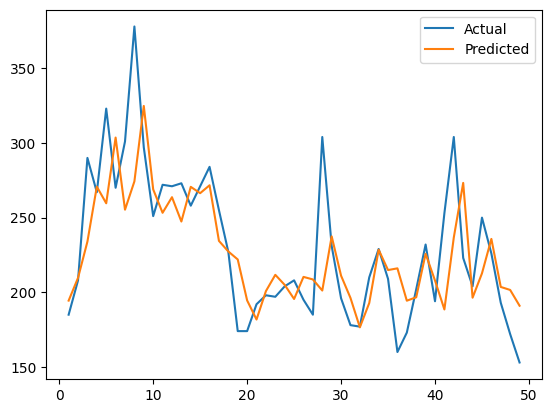

In [99]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [100]:
val_predictions = model4.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,290.170197,298.0
1,288.055145,298.0
2,286.985352,298.0
3,286.985352,298.0
4,286.985352,298.0
...,...,...
308,196.227188,193.0
309,224.525055,199.0
310,215.961044,197.0
311,211.992767,197.0


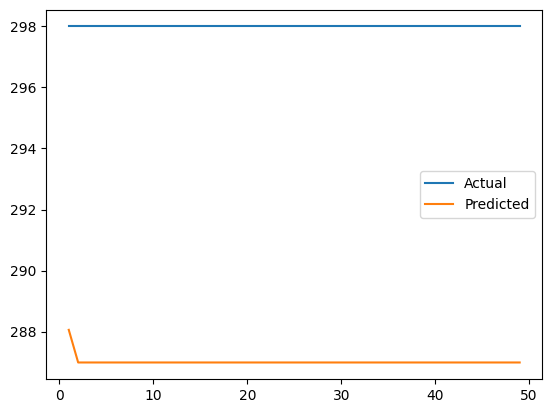

In [101]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [102]:
test_predictions = model4.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,219.401047,190.0
1,210.545639,177.0
2,201.679749,172.0
3,198.468430,170.0
4,195.205704,197.0
...,...,...
310,161.614182,134.0
311,156.129868,144.0
312,164.891525,155.0
313,168.693237,155.0


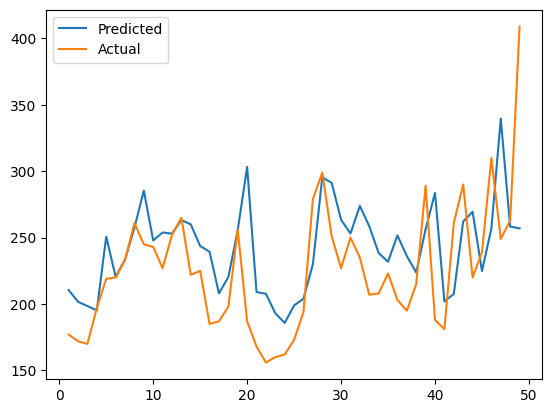

In [103]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

# 5 - Deep Learning Model(With Scaling)

# 5.1. Splitting & Preprocessing the Raw Data(Normal AQI)

In [106]:
aqi_normal = new_data4.copy()

In [107]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(aqi_normal)

In [108]:
def new_data_to_X_y(new_data, window_size, train_pct, val_pct, test_pct):
    
    new_data_as_np = new_data
    
    # Split features and target
    features = new_data_as_np[:, :-1]  # All columns except the last one
    target = new_data_as_np[:, -1]     # Only the AQI column
    
    # Split data based on percentages
    total_len = len(features)
    train_end = int(train_pct * total_len)
    val_end = train_end + int(val_pct * total_len)
    
    # Prepare train, val, and test splits for both features and target
    train_features = features[:train_end]
    train_target = target[:train_end]
    
    val_features = features[train_end:val_end]
    val_target = target[train_end:val_end]
    
    test_features = features[val_end:]
    test_target = target[val_end:]
    
    # Helper function to create X and y
    def create_X_y(feature_data, target_data):
        X, y = [], []
        for i in range(len(feature_data) - window_size):
            # Create sequence of all features
            sequence = feature_data[i:i + window_size]
            X.append(sequence)
            # Get the target AQI value
            y.append(target_data[i + window_size])
        return np.array(X), np.array(y)
    
    
    X_train, y_train = create_X_y(train_features, train_target)
    X_val, y_val = create_X_y(val_features, val_target)
    X_test, y_test = create_X_y(test_features, test_target)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [109]:
WINDOW_SIZE = 6
NUM_FEATURES = 5
train_pct = 0.8
val_pct = 0.1
test_pct = 0.1

(X_train1, y_train1), (X_val1, y_val1), (X_test1, y_test1) = new_data_to_X_y(
    scaled_data, WINDOW_SIZE, train_pct, val_pct, test_pct
)

In [110]:
# shapes
print("Train shapes:", X_train1.shape, y_train1.shape)
print("Validation shapes:", X_val1.shape, y_val1.shape)
print("Test shapes:", X_test1.shape, y_test1.shape)

Train shapes: (1652, 6, 5) (1652,)
Validation shapes: (201, 6, 5) (201,)
Test shapes: (202, 6, 5) (202,)


#  5.2. DL Model

In [111]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

Bi-LSTM

In [112]:
lstm_model_v = Sequential()
lstm_model_v.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
lstm_model_v.add(BatchNormalization())
lstm_model_v.add(Bidirectional(LSTM(64, return_sequences=True)))
lstm_model_v.add(Dropout(0.3))
lstm_model_v.add(Bidirectional(LSTM(32)))
lstm_model_v.add(Dropout(0.3))
lstm_model_v.add(Dense(32, activation='relu'))
lstm_model_v.add(BatchNormalization())
lstm_model_v.add(Dense(16, activation='relu'))
lstm_model_v.add(Dense(1, activation='linear'))

lstm_model_v.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_10               │ (None, 6, 5)                │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 6, 128)              │          35,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,829 (311.83 KB)

 Trainable params: 79,755 (311.54 KB)

 Non-trainable params: 74 (296.00 B)

In [113]:
cp5 = ModelCheckpoint('/kaggle/working/lstm_model_v1.keras', save_best_only=True)

lstm_model_v.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [114]:
lstm_model_v.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp5])

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 1.5252 - mean_absolute_error: 0.9140 - val_loss: 0.5926 - val_mean_absolute_error: 0.5637
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4358 - mean_absolute_error: 0.5060 - val_loss: 0.5422 - val_mean_absolute_error: 0.5438
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4117 - mean_absolute_error: 0.4733 - val_loss: 0.5201 - val_mean_absolute_error: 0.5295
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3199 - mean_absolute_error: 0.4270 - val_loss: 0.4617 - val_mean_absolute_error: 0.4919
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2957 - mean_absolute_error: 0.4065 - val_loss: 0.4573 - val_mean_absolute_error: 0.4976
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3255 - mean_absolute_error: 0.4235 - val_loss: 0.3805 - val_mean_absolute_error: 0.4386
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2978 - mean_absolute_error: 0.3907 - v

In [115]:
from tensorflow.keras.models import load_model
model5 = load_model('/kaggle/working/lstm_model_v1.keras')

In [116]:
# Evaluate the model on the train data
train_result = model5.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 0.2514
Mean Squared Error (MSE): 0.1448
Root Mean Squared Error (RMSE): 0.3805
R-squared (Accuracy): 0.8533


In [117]:
# Evaluate the model on the validation data
val_result = model5.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 0.2670
Mean Squared Error (MSE): 0.2187
Root Mean Squared Error (RMSE): 0.4676
R-squared (Accuracy): 0.6819


In [118]:
# Evaluate the model on the test data
test_result = model5.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 0.4322
Mean Squared Error (MSE): 0.4477
Root Mean Squared Error (RMSE): 0.6691
R-squared (Accuracy): 0.6700


In [119]:
train_predictions = model5.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Train Predictions,Actuals
0,-0.249189,-0.051393
1,-0.236070,-0.040277
2,-0.270064,-0.151439
3,-0.315075,-0.251485
4,-0.259248,-0.062509
...,...,...
1647,-0.798575,-0.907341
1648,-0.798575,-0.907341
1649,-0.798575,-0.907341
1650,-0.798575,-0.907341


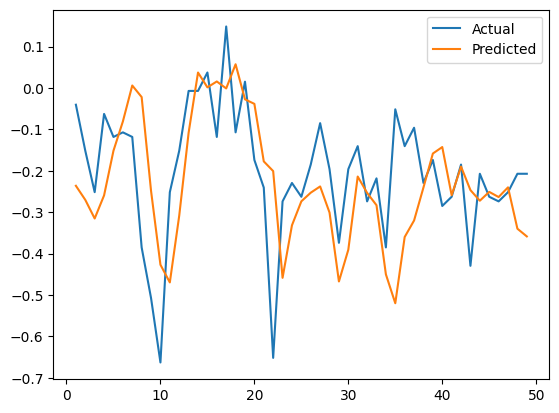

In [120]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [121]:
val_predictions = model5.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,-0.798575,-0.907341
1,-0.798575,-0.907341
2,-0.798575,-0.907341
3,-0.798575,-0.907341
4,-0.798575,-0.907341
...,...,...
196,-0.357118,-0.218136
197,-0.357118,-0.218136
198,-0.357118,-0.218136
199,-0.357118,-0.607204


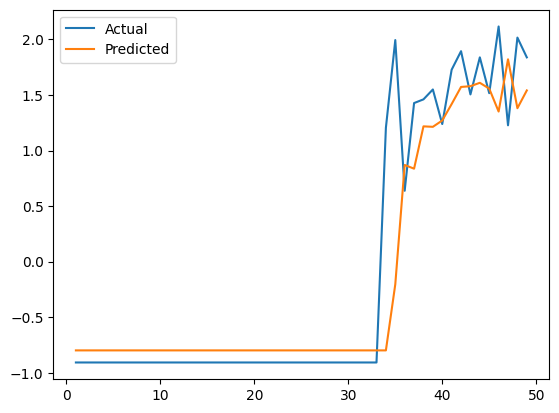

In [122]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [123]:
test_predictions = model5.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,-0.735968,-0.607204
1,-0.735968,-0.607204
2,-0.735968,-0.607204
3,-0.735968,-0.607204
4,-0.735968,-0.607204
...,...,...
197,1.533548,1.304785
198,1.126562,1.004647
199,0.990995,0.515534
200,1.063800,0.837904


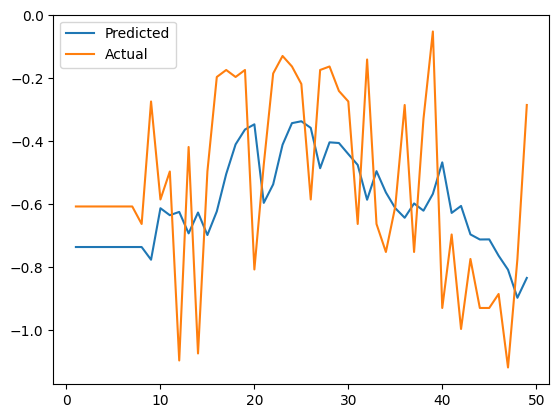

In [124]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

GRU

In [126]:
gru_model_v = Sequential()
gru_model_v.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
gru_model_v.add(BatchNormalization())
gru_model_v.add(Bidirectional(GRU(64, return_sequences=True)))
gru_model_v.add(Dropout(0.3))
gru_model_v.add(Bidirectional(GRU(32)))
gru_model_v.add(Dropout(0.3))
gru_model_v.add(Dense(32, activation='relu'))
gru_model_v.add(BatchNormalization())
gru_model_v.add(Dense(16, activation='relu'))
gru_model_v.add(Dense(1, activation='linear'))

gru_model_v.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_14               │ (None, 6, 5)                │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_14 (Bidirectional)     │ (None, 6, 128)              │          27,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_15 (Bidirectional)     │ (None, 64)                  │          31,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,141 (238.83 KB)

 Trainable params: 61,067 (238.54 KB)

 Non-trainable params: 74 (296.00 B)

In [127]:
cp6 = ModelCheckpoint('/kaggle/working/gru_model_v1.keras', save_best_only=True)

gru_model_v.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [128]:
gru_model_v.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp6])

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.9596 - mean_absolute_error: 0.7030 - val_loss: 0.4861 - val_mean_absolute_error: 0.4762
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4066 - mean_absolute_error: 0.4889 - val_loss: 0.3904 - val_mean_absolute_error: 0.4233
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3590 - mean_absolute_error: 0.4490 - val_loss: 0.3455 - val_mean_absolute_error: 0.3704
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3374 - mean_absolute_error: 0.4308 - val_loss: 0.3112 - val_mean_absolute_error: 0.3418
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3150 - mean_absolute_error: 0.4153 - val_loss: 0.2904 - val_mean_absolute_error: 0.3013
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3143 - mean_absolute_error: 0.4139 - val_loss: 0.2734 - val_mean_absolute_error: 0.2892
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3006 - mean_absolute_error: 0.4038 - v

In [129]:
from tensorflow.keras.models import load_model
model6 = load_model('/kaggle/working/gru_model_v1.keras')

In [130]:
# Evaluate the model on the train data
train_result = model6.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 0.2498
Mean Squared Error (MSE): 0.1480
Root Mean Squared Error (RMSE): 0.3847
R-squared (Accuracy): 0.8501


In [131]:
# Evaluate the model on the validation data
val_result = model6.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 0.2376
Mean Squared Error (MSE): 0.2076
Root Mean Squared Error (RMSE): 0.4557
R-squared (Accuracy): 0.6980


In [132]:
# Evaluate the model on the test data
test_result = model6.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 0.4027
Mean Squared Error (MSE): 0.3772
Root Mean Squared Error (RMSE): 0.6142
R-squared (Accuracy): 0.7220


In [133]:
train_predictions = model6.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,-0.217682,-0.051393
1,-0.196964,-0.040277
2,-0.249573,-0.151439
3,-0.326962,-0.251485
4,-0.265591,-0.062509
...,...,...
1647,-0.853206,-0.907341
1648,-0.853206,-0.907341
1649,-0.853206,-0.907341
1650,-0.853206,-0.907341


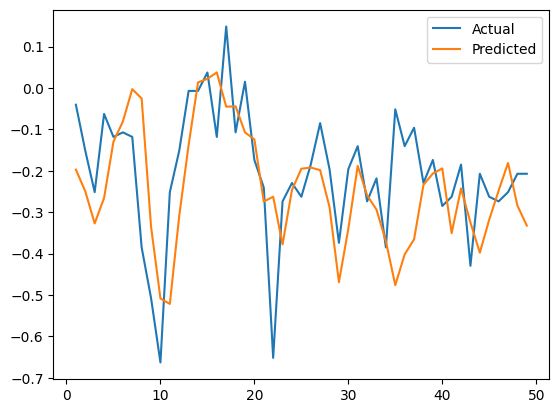

In [134]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [135]:
val_predictions = model6.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,-0.853206,-0.907341
1,-0.853206,-0.907341
2,-0.853206,-0.907341
3,-0.853206,-0.907341
4,-0.853206,-0.907341
...,...,...
196,-0.225000,-0.218136
197,-0.225000,-0.218136
198,-0.225000,-0.218136
199,-0.225000,-0.607204


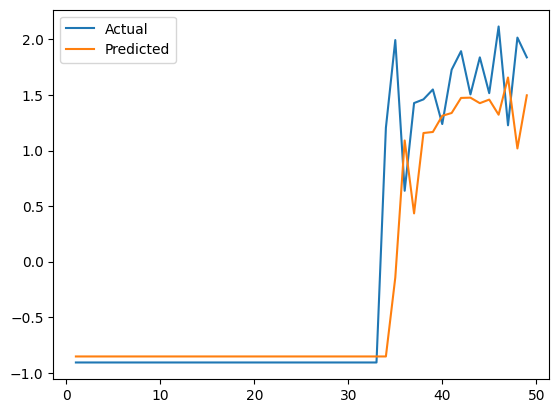

In [136]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [137]:
test_predictions = model6.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,-0.563635,-0.607204
1,-0.563635,-0.607204
2,-0.563635,-0.607204
3,-0.563635,-0.607204
4,-0.563635,-0.607204
...,...,...
197,1.204932,1.304785
198,1.150408,1.004647
199,1.046563,0.515534
200,0.980054,0.837904


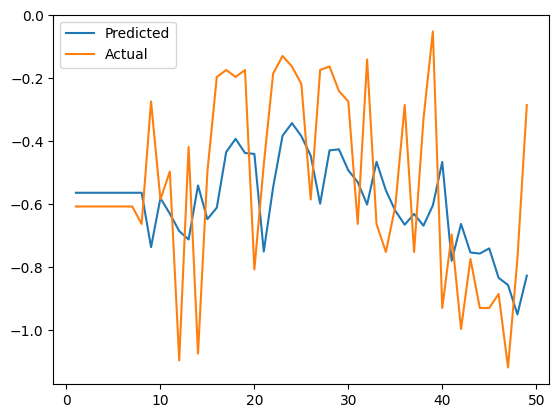

In [138]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

RNN

In [139]:
rnn_model_v = Sequential()
rnn_model_v.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
rnn_model_v.add(BatchNormalization())
rnn_model_v.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
rnn_model_v.add(Dropout(0.3))
rnn_model_v.add(Bidirectional(SimpleRNN(32)))
rnn_model_v.add(Dropout(0.3))
rnn_model_v.add(Dense(32, activation='relu'))
rnn_model_v.add(BatchNormalization())
rnn_model_v.add(Dense(16, activation='relu'))
rnn_model_v.add(Dense(1, activation='linear'))

rnn_model_v.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_16               │ (None, 6, 5)                │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_16 (Bidirectional)     │ (None, 6, 128)              │           8,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_17 (Bidirectional)     │ (None, 64)                  │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,037 (86.08 KB)

 Trainable params: 21,963 (85.79 KB)

 Non-trainable params: 74 (296.00 B)

In [142]:
cp7 = ModelCheckpoint('/kaggle/working/rnn_model_v1.keras', save_best_only=True)

rnn_model_v.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [143]:
rnn_model_v.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp7])

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 1.3319 - mean_absolute_error: 0.9022 - val_loss: 0.5347 - val_mean_absolute_error: 0.5304
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5998 - mean_absolute_error: 0.6181 - val_loss: 0.3932 - val_mean_absolute_error: 0.4161
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4543 - mean_absolute_error: 0.5210 - val_loss: 0.3118 - val_mean_absolute_error: 0.3578
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4174 - mean_absolute_error: 0.4853 - val_loss: 0.3039 - val_mean_absolute_error: 0.3343
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3900 - mean_absolute_error: 0.4812 - val_loss: 0.2913 - val_mean_absolute_error: 0.3513
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3707 - mean_absolute_error: 0.4580 - val_loss: 0.2891 - val_mean_absolute_error: 0.3791
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3387 - mean_absolute_error: 0.4463 - val_lo

In [144]:
from tensorflow.keras.models import load_model
model7 = load_model('/kaggle/working/rnn_model_v1.keras')

In [145]:
# Evaluate the model on the train data
train_result = model7.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 0.2416
Mean Squared Error (MSE): 0.1454
Root Mean Squared Error (RMSE): 0.3813
R-squared (Accuracy): 0.8527


In [146]:
# Evaluate the model on the validation data
val_result = model7.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 0.2469
Mean Squared Error (MSE): 0.2184
Root Mean Squared Error (RMSE): 0.4673
R-squared (Accuracy): 0.6823


In [147]:
# Evaluate the model on the test data
test_result = model7.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 0.3915
Mean Squared Error (MSE): 0.3363
Root Mean Squared Error (RMSE): 0.5799
R-squared (Accuracy): 0.7521


In [148]:
train_predictions = model7.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Train Predictions,Actuals
0,-0.227637,-0.051393
1,-0.103765,-0.040277
2,-0.309416,-0.151439
3,-0.405058,-0.251485
4,-0.419103,-0.062509
...,...,...
1647,-0.878066,-0.907341
1648,-0.878066,-0.907341
1649,-0.878066,-0.907341
1650,-0.878066,-0.907341


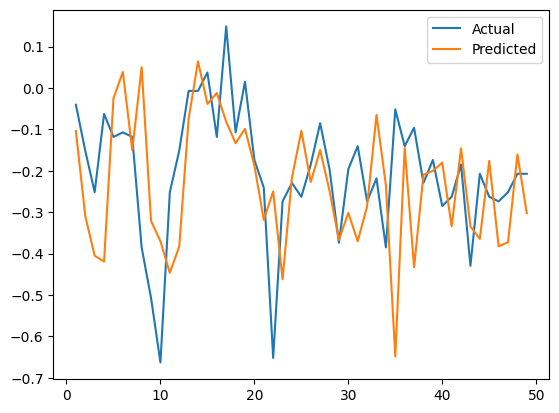

In [149]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [150]:
val_predictions = model7.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,-0.878066,-0.907341
1,-0.878066,-0.907341
2,-0.878066,-0.907341
3,-0.878066,-0.907341
4,-0.878066,-0.907341
...,...,...
196,-0.193223,-0.218136
197,-0.193223,-0.218136
198,-0.193223,-0.218136
199,-0.193223,-0.607204


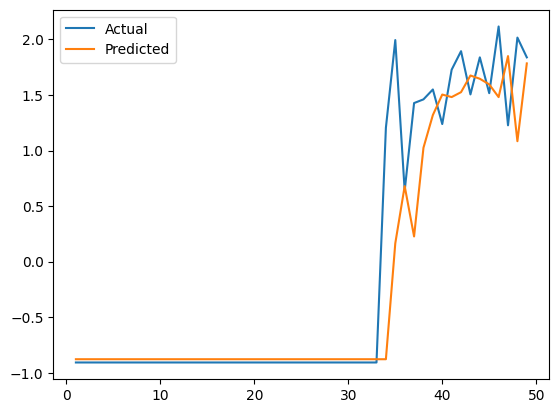

In [151]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [152]:
test_predictions = model7.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,-0.492847,-0.607204
1,-0.492847,-0.607204
2,-0.492847,-0.607204
3,-0.492847,-0.607204
4,-0.492847,-0.607204
...,...,...
197,1.278988,1.304785
198,1.421693,1.004647
199,1.345359,0.515534
200,0.931103,0.837904


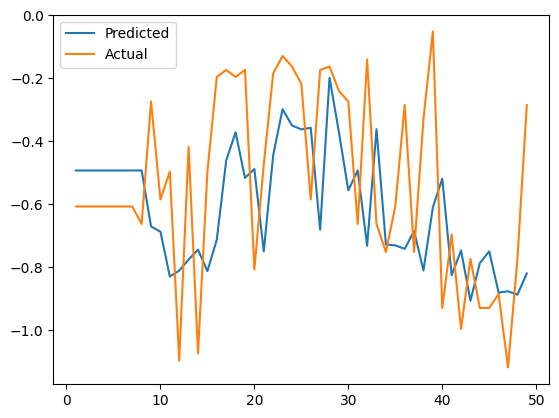

In [153]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

CNN-GRU(Bi)

In [154]:
cnn_gru_model_v = Sequential()
cnn_gru_model_v.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
cnn_gru_model_v.add(BatchNormalization())
cnn_gru_model_v.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn_gru_model_v.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn_gru_model_v.add(Dropout(0.3))
cnn_gru_model_v.add(Bidirectional(GRU(32, return_sequences=True)))
cnn_gru_model_v.add(Dropout(0.3))
cnn_gru_model_v.add(Bidirectional(GRU(16)))
cnn_gru_model_v.add(Dense(32, activation='relu'))
cnn_gru_model_v.add(BatchNormalization())
cnn_gru_model_v.add(Dense(16, activation='relu'))
cnn_gru_model_v.add(Dense(1, activation='linear'))

cnn_gru_model_v.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_18               │ (None, 6, 5)                │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 6, 128)              │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 6, 64)               │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_18 (Bidirectional)     │ (None, 6, 64)               │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_19 (Bidirectional)     │ (None, 32)                  │           7,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,125 (215.33 KB)

 Trainable params: 55,051 (215.04 KB)

 Non-trainable params: 74 (296.00 B)

In [155]:
cp8 = ModelCheckpoint('/kaggle/working/cnn_gru_model_v1.keras', save_best_only=True)

cnn_gru_model_v.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [156]:
cnn_gru_model_v.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp8])

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.7559 - mean_absolute_error: 0.6440 - val_loss: 0.5964 - val_mean_absolute_error: 0.5295
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3481 - mean_absolute_error: 0.4419 - val_loss: 0.5287 - val_mean_absolute_error: 0.4912
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2882 - mean_absolute_error: 0.3884 - val_loss: 0.4661 - val_mean_absolute_error: 0.4757
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2848 - mean_absolute_error: 0.3801 - val_loss: 0.4433 - val_mean_absolute_error: 0.4552
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2546 - mean_absolute_error: 0.3618 - val_loss: 0.3914 - val_mean_absolute_error: 0.4089
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2464 - mean_absolute_error: 0.3531 - val_loss: 0.3393 - val_mean_absolute_error: 0.3956
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2217 - mean_absolute_error: 0.3331 - v

In [157]:
from tensorflow.keras.models import load_model
model8 = load_model('/kaggle/working/cnn_gru_model_v1.keras')

In [158]:
# Evaluate the model on the train data
train_result = model8.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 0.2261
Mean Squared Error (MSE): 0.1173
Root Mean Squared Error (RMSE): 0.3424
R-squared (Accuracy): 0.8812


In [159]:
# Evaluate the model on the validation data
val_result = model8.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 0.2681
Mean Squared Error (MSE): 0.2136
Root Mean Squared Error (RMSE): 0.4622
R-squared (Accuracy): 0.6893


In [160]:
# Evaluate the model on the test data
test_result = model8.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 0.4068
Mean Squared Error (MSE): 0.3625
Root Mean Squared Error (RMSE): 0.6021
R-squared (Accuracy): 0.7328


In [161]:
train_predictions = model8.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Train Predictions,Actuals
0,-0.254982,-0.051393
1,-0.122294,-0.040277
2,-0.389709,-0.151439
3,-0.446165,-0.251485
4,-0.326342,-0.062509
...,...,...
1647,-0.776584,-0.907341
1648,-0.776584,-0.907341
1649,-0.776584,-0.907341
1650,-0.776584,-0.907341


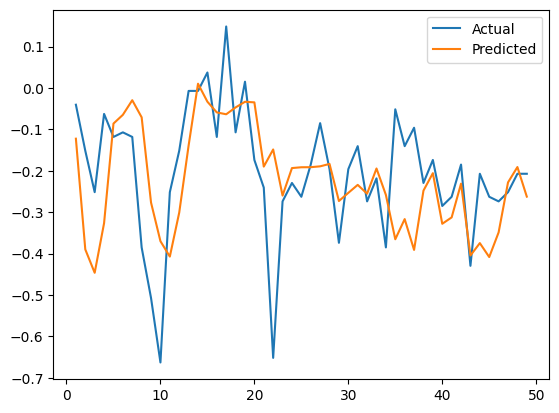

In [162]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [163]:
val_predictions = model8.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,-0.776584,-0.907341
1,-0.776584,-0.907341
2,-0.776584,-0.907341
3,-0.776584,-0.907341
4,-0.776584,-0.907341
...,...,...
196,-0.159356,-0.218136
197,-0.159356,-0.218136
198,-0.159356,-0.218136
199,-0.159356,-0.607204


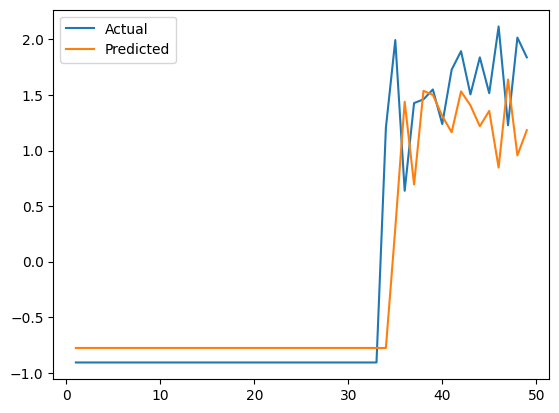

In [164]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [165]:
test_predictions = model8.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,-0.516102,-0.607204
1,-0.516102,-0.607204
2,-0.516102,-0.607204
3,-0.516102,-0.607204
4,-0.516102,-0.607204
...,...,...
197,1.389782,1.304785
198,1.370638,1.004647
199,1.447577,0.515534
200,1.054017,0.837904


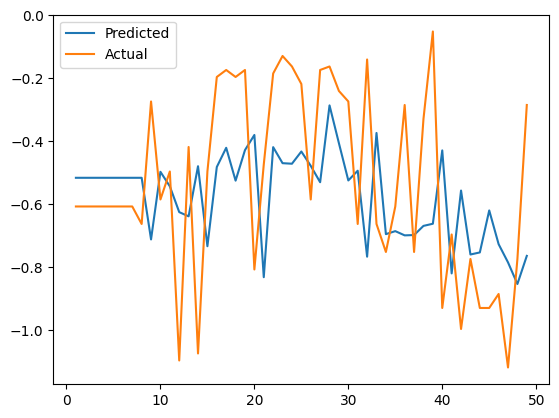

In [166]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

# Best model neural network without scaling

In [104]:
from joblib import load  

# Load the model
model = load('/kaggle/working/models/best_model_neural_network_20250122_200643.joblib')

# Predict using the model
predictions = model.predict(data)

# Add predictions to the original dataframe
data['predictions'] = predictions 

os.makedirs('/kaggle/working', exist_ok=True)

# Save to CSV
data.to_csv('/kaggle/working/india_delhi_predictions.csv')